## Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

#### Exploratory data analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
transactionData = pd.read_excel("QVI_transaction_data.xlsx")
customerData = pd.read_csv("QVI_purchase_behaviour.csv")

In [3]:
print(transactionData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None


In [4]:
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], origin='1899-12-30', unit='D')
transactionData.groupby('PROD_NAME').size().reset_index(name='N')


,PROD_NAME,N
0,Burger Rings 220g,1564
1,CCs Nacho Cheese 175g,1498
2,CCs Original 175g,1514
3,CCs Tasty Cheese 175g,1539
4,Cheetos Chs & Bacon Balls 190g,1479
...,...,...
109,WW Sour Cream &OnionStacked Chips 160g,1483
110,WW Supreme Cheese Corn Chips 200g,1509
111,Woolworths Cheese Rings 190g,1516
112,Woolworths Medium Salsa 300g,1430


In [5]:
unique_prod_names = transactionData['PROD_NAME'].unique()

#split the product names into individual words
product_words = pd.DataFrame({'words': [word for name in unique_prod_names for word in name.split()]})

# remove contain numbers
product_words = product_words[~product_words['words'].str.contains(r'\d')]

# remove spcial characters
product_words = product_words[product_words['words'].str.match(r'^[a-zA-Z]+$')]

# rank by frequency
word_counts = product_words['words'].value_counts().reset_index()
word_counts.columns = ['words', 'N']
word_counts = word_counts.sort_values(by='N', ascending=False)

print(word_counts)

         words   N
0        Chips  21
1       Smiths  16
2      Crinkle  14
3          Cut  14
4       Kettle  13
..         ...  ..
99      Vingar   1
98         Veg   1
97       Strws   1
96       Mango   1
167  Bolognese   1

[168 rows x 2 columns]


In [6]:
print(transactionData.describe())

                                DATE     STORE_NBR  LYLTY_CARD_NBR  \
count                         264836  264836.00000    2.648360e+05   
mean   2018-12-30 00:52:12.879215616     135.08011    1.355495e+05   
min              2018-07-01 00:00:00       1.00000    1.000000e+03   
25%              2018-09-30 00:00:00      70.00000    7.002100e+04   
50%              2018-12-30 00:00:00     130.00000    1.303575e+05   
75%              2019-03-31 00:00:00     203.00000    2.030942e+05   
max              2019-06-30 00:00:00     272.00000    2.373711e+06   
std                              NaN      76.78418    8.057998e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.648360e+05  264836.000000  264836.000000  264836.000000  
mean   1.351583e+05      56.583157       1.907309       7.304200  
min    1.000000e+00       1.000000       1.000000       1.500000  
25%    6.760150e+04      28.000000       2.000000       5.400000  
50%    1.351375e+05      56.000000

In [7]:
transactionData[transactionData['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [8]:
transactionData[transactionData['LYLTY_CARD_NBR'] == 226000]
transactionData = transactionData[transactionData['LYLTY_CARD_NBR'] != 226000]

In [9]:
transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292938240,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241


In [10]:
transactionData.groupby('DATE').size().reset_index(name='N')

,DATE,N
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


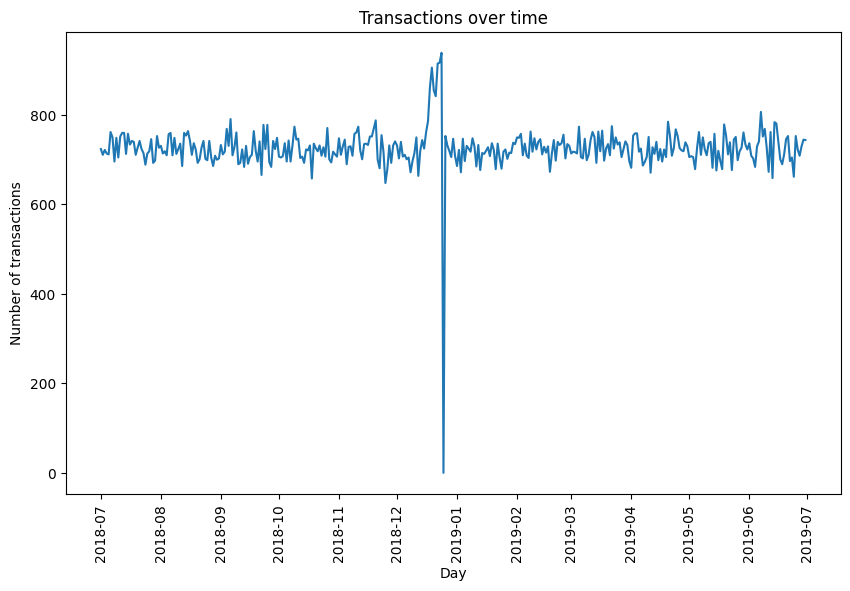

In [11]:
# create date series
all_dates = pd.DataFrame({'DATE': pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')})

# count transactions by date
transactions_by_day = transactionData.groupby('DATE').size().reset_index(name='N')

# merge date series with transaction counts
transactions_by_day = pd.merge(all_dates, transactions_by_day, on='DATE', how='left').fillna(0)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(transactions_by_day['DATE'], transactions_by_day['N'], marker='', linestyle='-')

ax.set_xlabel('Day')
ax.set_ylabel('Number of transactions')
ax.set_title('Transactions over time')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

plt.show()

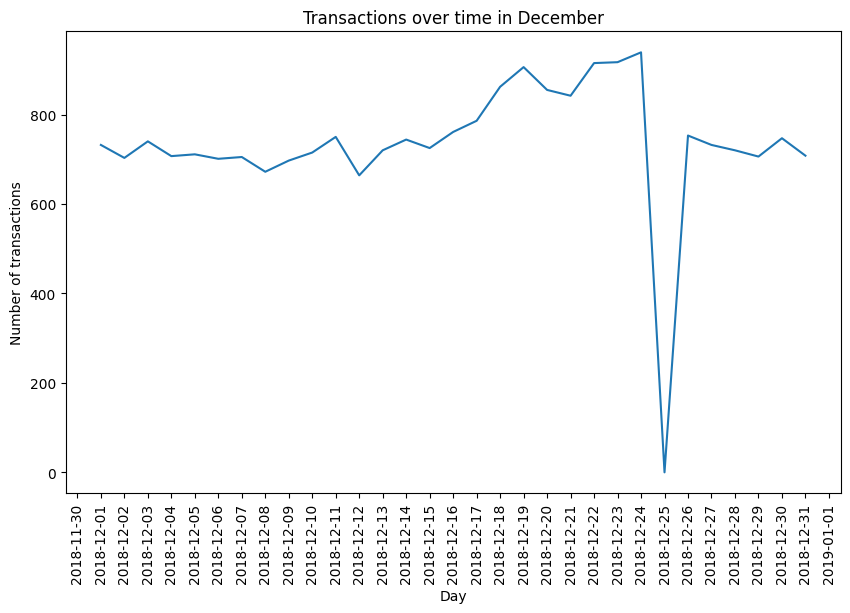

In [12]:
transactions_december = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(transactions_december['DATE'], transactions_december['N'], marker='', linestyle='-')

ax.set_xlabel('Day')
ax.set_ylabel('Number of transactions')
ax.set_title('Transactions over time in December')

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)

plt.show()

In [13]:
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract(r'(\d+)').astype(int)

# 检查PACK_SIZE是否合理
pack_size_counts = transactionData['PACK_SIZE'].value_counts().reset_index()
pack_size_counts.columns = ['PACK_SIZE', 'N']
pack_size_counts = pack_size_counts.sort_values(by='PACK_SIZE')

print(pack_size_counts)

    PACK_SIZE      N
18         70   1507
14         90   3008
3         110  22387
20        125   1454
2         134  25102
12        135   3257
1         150  43131
16        160   2970
5         165  15297
4         170  19983
0         175  66390
19        180   1468
15        190   2995
11        200   4473
10        210   6272
17        220   1564
13        250   3169
9         270   6285
6         300  15166
7         330  12540
8         380   6416


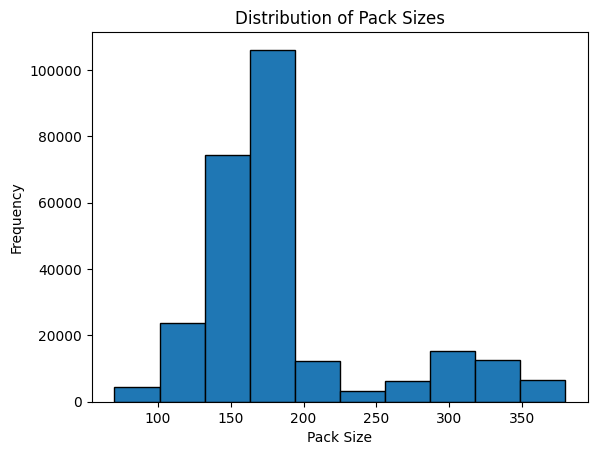

In [14]:
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract(r'(\d+)').astype(int)


plt.hist(transactionData['PACK_SIZE'], bins=10, edgecolor='black')

plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.title('Distribution of Pack Sizes')

plt.show()

In [15]:
# 提取品牌名称并转换为大写
transactionData['BRAND'] = transactionData['PROD_NAME'].apply(lambda x: x.split(' ')[0].upper())

# 检查品牌并按频率排序
brand_counts = transactionData['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'N']
brand_counts = brand_counts.sort_values(by='N', ascending=False)

print(brand_counts)

         BRAND      N
0       KETTLE  41288
1       SMITHS  28860
2     PRINGLES  25102
3      DORITOS  24962
4        THINS  14075
5          RRD  11894
6    INFUZIONS  11057
7           WW  10320
8         COBS   9693
9     TOSTITOS   9471
10    TWISTIES   9454
11         OLD   9324
12    TYRRELLS   6442
13       GRAIN   6272
14     NATURAL   6050
15         RED   5885
16    CHEEZELS   4603
17         CCS   4551
18  WOOLWORTHS   4437
19      DORITO   3183
20      INFZNS   3144
21       SMITH   2963
22     CHEETOS   2927
23       SNBTS   1576
24      BURGER   1564
25     GRNWVES   1468
26    SUNBITES   1432
27         NCC   1419
28      FRENCH   1418


In [16]:
transactionData['BRAND'] = transactionData['PROD_NAME'].apply(lambda x: x.split(' ')[0].upper())

# 替换品牌名称
brand_replacements = {
    "RED": "RRD",
    "SNBTS": "SUNBITES",
    "INFZNS": "INFUZIONS",
    "WW": "WOOLWORTHS",
    "SMITH": "SMITHS",
    "NCC": "NATURAL",
    "DORITO": "DORITOS",
    "GRAIN": "GRNWVES"
}

transactionData['BRAND'] = transactionData['BRAND'].replace(brand_replacements)

brand_counts = transactionData['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'N']
brand_counts = brand_counts.sort_values(by='BRAND')

print(brand_counts)


         BRAND      N
19      BURGER   1564
16         CCS   4551
18     CHEETOS   2927
15    CHEEZELS   4603
8         COBS   9693
2      DORITOS  28145
20      FRENCH   1418
12     GRNWVES   7740
6    INFUZIONS  14201
0       KETTLE  41288
13     NATURAL   7469
11         OLD   9324
3     PRINGLES  25102
4          RRD  17779
1       SMITHS  31823
17    SUNBITES   3008
7        THINS  14075
9     TOSTITOS   9471
10    TWISTIES   9454
14    TYRRELLS   6442
5   WOOLWORTHS  14757


In [17]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
customerData.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [19]:
lifestage_counts = customerData['LIFESTAGE'].value_counts().reset_index()
lifestage_counts.columns = ['LIFESTAGE', 'N']
lifestage_counts = lifestage_counts.sort_values(by='N', ascending=False)

print(lifestage_counts)

                LIFESTAGE      N
0                RETIREES  14805
1   OLDER SINGLES/COUPLES  14609
2   YOUNG SINGLES/COUPLES  14441
3          OLDER FAMILIES   9780
4          YOUNG FAMILIES   9178
5  MIDAGE SINGLES/COUPLES   7275
6            NEW FAMILIES   2549


In [20]:
premium_customer_counts = customerData['PREMIUM_CUSTOMER'].value_counts().reset_index()
premium_customer_counts.columns = ['PREMIUM_CUSTOMER', 'N']
premium_customer_counts = premium_customer_counts.sort_values(by='N', ascending=False)

print(premium_customer_counts)

  PREMIUM_CUSTOMER      N
0       Mainstream  29245
1           Budget  24470
2          Premium  18922


In [21]:
data = pd.merge(transactionData, customerData, on='LYLTY_CARD_NBR', how='left')

print(data)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264829 2019-03-09        272          272319  270088        89   
264830 2018-08-13        272          272358  270154        74   
264831 2018-11-06        272          272379  270187        51   
264832 2018-12-27        272          272379  270188        42   
264833 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [22]:
print(data['LIFESTAGE'].isnull().sum())
print(data['PREMIUM_CUSTOMER'].isnull().sum())

0
0


### Data analysis on customer segments

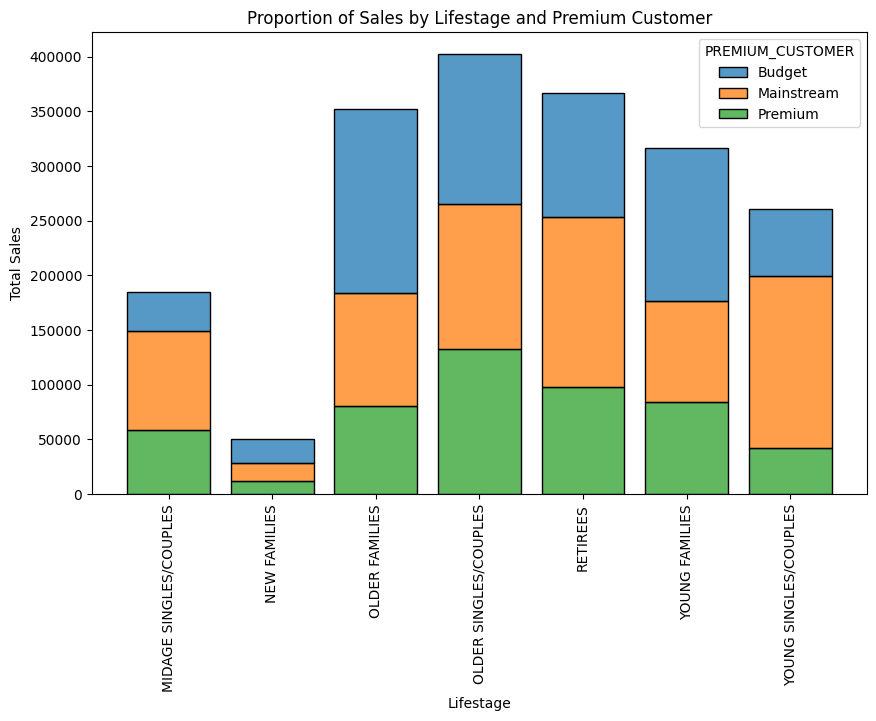

In [23]:
# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'SALES']

plt.figure(figsize=(10, 6))
p = sns.histplot(
    data=sales,
    x='LIFESTAGE',
    hue='PREMIUM_CUSTOMER',
    weights='SALES',
    multiple='stack',
    shrink=0.8
)

p.set_xlabel('Lifestage')
p.set_ylabel('Total Sales')
p.set_title('Proportion of Sales by Lifestage and Premium Customer')

plt.xticks(rotation=90)
plt.show()

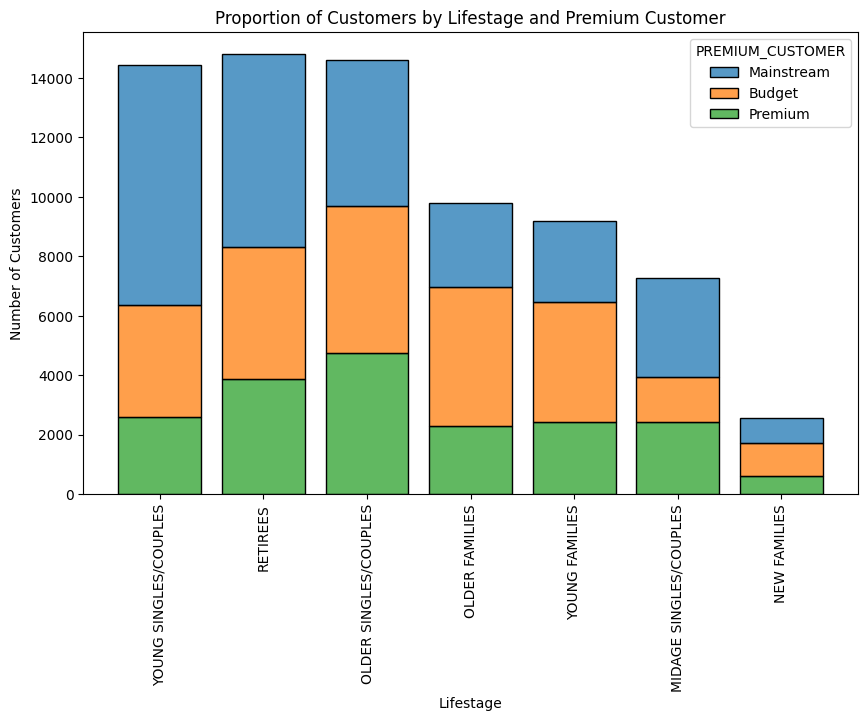

In [24]:
# Calculate total customers by LIFESTAGE and PREMIUM_CUSTOMER
customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'CUSTOMERS']

# Order by LIFESTAGE DESC
customers = customers.sort_values(by='CUSTOMERS', ascending=False)


plt.figure(figsize=(10, 6))
p = sns.histplot(
    data=customers,
    x='LIFESTAGE',
    hue='PREMIUM_CUSTOMER',
    weights='CUSTOMERS',
    multiple='stack',
    shrink=0.8
)

p.set_xlabel('Lifestage')
p.set_ylabel('Number of Customers')
p.set_title('Proportion of Customers by Lifestage and Premium Customer')


plt.xticks(rotation=90)
plt.show()

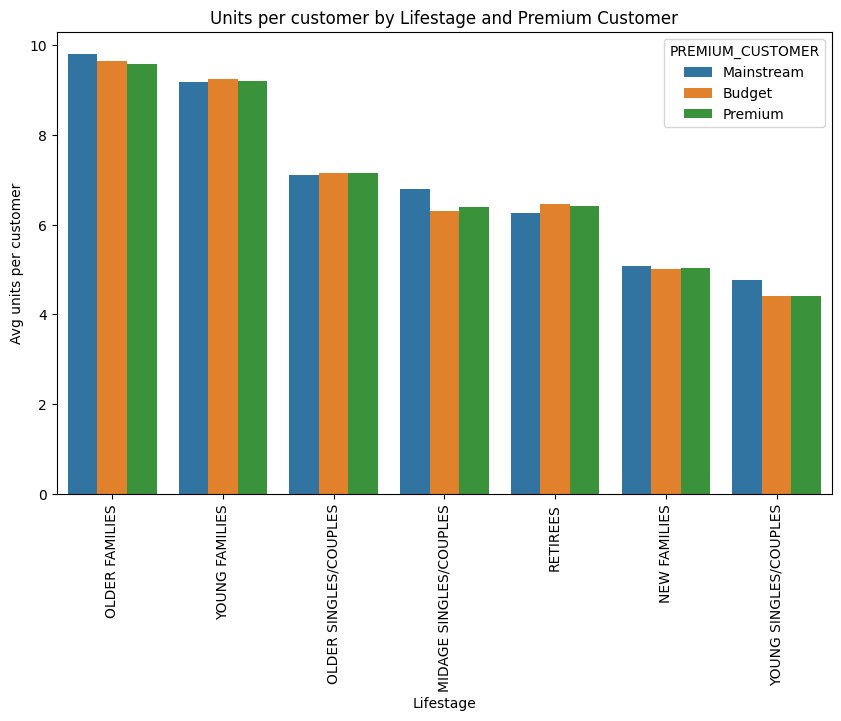

In [25]:
# Calculate average units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: pd.Series({'AVG': x['PROD_QTY'].sum() / x['LYLTY_CARD_NBR'].nunique()})
).reset_index()

avg_units = avg_units.sort_values(by='AVG', ascending=False)

plt.figure(figsize=(10, 6))
p = sns.barplot(
    data=avg_units,
    x='LIFESTAGE',
    y='AVG',
    hue='PREMIUM_CUSTOMER',
    dodge=True
)

p.set_xlabel('Lifestage')
p.set_ylabel('Avg units per customer')
p.set_title('Units per customer by Lifestage and Premium Customer')

plt.xticks(rotation=90)

plt.show()

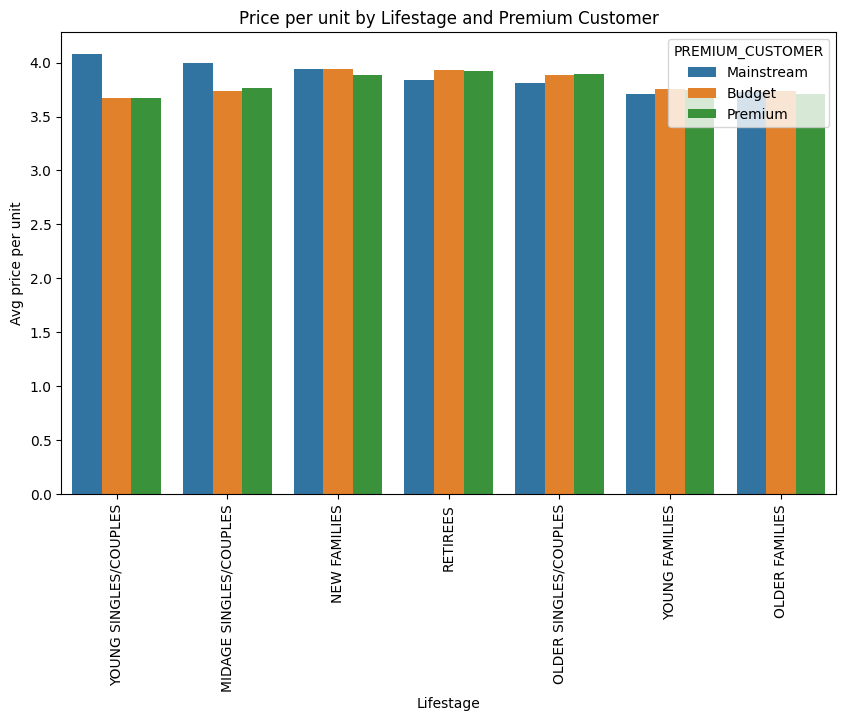

In [26]:
# Calculate average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).apply(
    lambda x: pd.Series({'AVG': x['TOT_SALES'].sum() / x['PROD_QTY'].sum()})
).reset_index()

# Order by LIFESTAGE DESC
avg_price = avg_price.sort_values(by='AVG', ascending=False)


plt.figure(figsize=(10, 6))
p = sns.barplot(
    data=avg_price,
    x='LIFESTAGE',
    y='AVG',
    hue='PREMIUM_CUSTOMER',
    dodge=True
)

p.set_xlabel('Lifestage')
p.set_ylabel('Avg price per unit')
p.set_title('Price per unit by Lifestage and Premium Customer')

plt.xticks(rotation=90)

plt.show()

In [28]:
# Deep analyze Mainstream, young singles/couples
segment1 = data[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream')]
other = data[~((data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Compare the brand affinity of the two segments
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

quantity_segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_segment1_by_brand['targetSegment'] = quantity_segment1_by_brand['PROD_QTY'] / quantity_segment1
quantity_segment1_by_brand = quantity_segment1_by_brand[['BRAND', 'targetSegment']]

quantity_other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_other_by_brand['other'] = quantity_other_by_brand['PROD_QTY'] / quantity_other
quantity_other_by_brand = quantity_other_by_brand[['BRAND', 'other']]

brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND', how='outer').fillna(0)
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

print(brand_proportions)

         BRAND  targetSegment     other  affinityToBrand
19    TYRRELLS       0.029587  0.023933         1.236235
18    TWISTIES       0.043306  0.035283         1.227401
9       KETTLE       0.185649  0.154216         1.203823
17    TOSTITOS       0.042581  0.035377         1.203638
11         OLD       0.041598  0.034753         1.196958
12    PRINGLES       0.111980  0.093743         1.194536
5      DORITOS       0.122877  0.105277         1.167176
4         COBS       0.041856  0.036375         1.150700
8    INFUZIONS       0.060649  0.053157         1.140947
16       THINS       0.056611  0.053084         1.066445
7      GRNWVES       0.030674  0.029052         1.055825
3     CHEEZELS       0.016851  0.017370         0.970141
14      SMITHS       0.093420  0.121714         0.767536
6       FRENCH       0.003702  0.005364         0.690113
2      CHEETOS       0.007533  0.011240         0.670145
13         RRD       0.045377  0.068426         0.663149
10     NATURAL       0.018379  

In [29]:
unique_prod_names = data[data['PACK_SIZE'] == 270]['PROD_NAME'].unique()

print(unique_prod_names)

['Twisties Cheese     270g' 'Twisties Chicken270g']


Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and re- tirees is due to there being more of them than other buyers. Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour. We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips compared to the rest of the population. The Category Manager may want to increase the category’s per- formance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments where young singles and couples frequent more often to increase visibilty and impulse behaviour.